# Shapley Values

<h1 style="font-weight: bold; background: linear-gradient(to left, yellow, red); -webkit-background-clip: text; color: transparent;"> Understanding Shapley Values</h1>

<h2 style="font-weight: bold; background: linear-gradient(to right, magenta, cyan); -webkit-background-clip: text; color: transparent;"> Cooperative Games and Coalitions</h2>

## Introduction

Have you ever wondered how to fairly attribute contributions in a collaborative project? Or perhaps you're trying to explain which features in your machine learning model are most important for a specific prediction? Enter Shapley Values—a concept from cooperative game theory that has found a powerful application in the world of explainable AI.

<img src="meme.jpg" style="display: block; margin-left: auto; margin-right: auto;" />

In this post, we'll explore what Shapley Values are, how they work, and how they can be applied to explain predictions in machine learning models.

### Cooperative Games and Coalitions: The Foundation
Before diving into Shapley Values themselves, let's understand their origin—cooperative game theory.

In cooperative games, players work together toward shared goals rather than competing against one another. Players coordinate actions, share resources, and succeed or fail as a team. Think board games like Pandemic, where players collaborate to stop disease outbreaks, or Hanabi, where players collectively build firework displays through communication.

 - A coalition is a temporary alliance of players who agree to work together for mutual benefit. Coalitions often involve pooling resources or coordinating actions. 
- A complete coalition or "grand coalition" forms when all players agree to cooperate, uniting all participants in pursuit of shared objectives.

<h2 style="font-weight: bold; background: linear-gradient(to right, magenta, cyan); -webkit-background-clip: text; color: transparent;">Fairness Axioms and Mathematical Foundation</h2>

## The Fairness Problem

Here's where it gets interesting. When players work together and create value, how do we fairly distribute the rewards? This is precisely where Shapley Values shine.

Imagine a project where three team members—Atul, Bhumi, and Chetna—collaborate. The project succeeds and generates ₹10,000 in value. Who deserves what share of this value? Should they split it equally? Or should some members receive more based on their contributions?

*_The Shapley Value provides a mathematically rigorous solution for distributing payoffs in a coalition that satisfies all fairness axioms._*

### The Fundamental Role of Shapley Values

- In a cooperative game with a set of players $ N = \{1, 2, \dots, n\} $, a **characteristic function** $ v $ is a mapping from all subsets of players (coalitions) $ S \subseteq N $ to real numbers, i.e., $v: 2^N \rightarrow \mathbb{R}$ such that $ v(S) $ represents the total payoff that coalition $ S $ can achieve if they cooperate.
- The payoff allocation to each player is determined based on the characteristic function.
- A key concept here is that a player's payoff depends on the value of the coalitions that they are part of.
- The Shapley value provides the unique solution for distributing payoffs in a grand coalition that satisfies all fairness axioms.
- In other words, if we want to distribute value in a way that is symmetric, efficient, and fair to both contributors and non-contributors, Shapley values are mathematically proven to be the only solution that works.

### The Four Fairness Axioms of Shapley Values
The Shapley value ensures fair distribution of cooperative gains based on each player's marginal contributions. It adheres to these axioms:

1. **Symmetry**: Players who contribute equally receive equal payoffs  
   - Mathematical Definition: For any players $i$ and $j$, if $v(S \cup \{i\}) = v(S \cup \{j\})$ for all coalitions $S \subseteq N \setminus \{i,j\}$, then $\phi_i(v) = \phi_j(v)$  
   - This means if two players are interchangeable in terms of their contributions, they must receive the same payoff.

2. **Null Player**: Players who add no value to any coalition receive zero payoff  
   - Mathematical Definition: If $v(S \cup \{i\}) = v(S)$ for all $S \subseteq N \setminus \{i\}$, then $\phi_i(v) = 0$  
   - This ensures that players who never contribute marginal value receive no payment.

3. **Efficiency**: The total value is fully distributed among players  
   - Mathematical Definition: $\sum_{i} \phi_i(v) = v(N)$  
   - The sum of all Shapley values equals the value of the grand coalition.

4. **Additivity**: Payoffs can be expressed as the sum of payoffs from subgames  
   - Mathematical Definition: For any two characteristic functions $v$ and $w$, $\phi_i(v + w) = \phi_i(v) + \phi_i(w)$  
   - This allows complex games to be broken down into simpler components.

## Coalition Mathematics
For a game with $N$ players:
- There are $N!$ ways to arrange the players in an ordered grand coalition (permutations).
- Each grand coalition represents one complete ordering of all $N$ players.

Example:
For $N = 3$ players {A, B, C}, the possible ordered grand coalitions (permutations) are:
{A, B, C}, {A, C, B}, {B, A, C}, {B, C, A}, {C, A, B}, {C, B, A}

### Shapley Value Definition
The Shapley value for player $i$ is defined as the average marginal contribution over all $N!$ ordered grand coalitions:

$
\phi_i(v) = \frac{1}{N!}\sum_{\pi \in \Pi}[v(P_i^\pi \cup \{i\}) - v(P_i^\pi)]
$

Where:
- $\Pi$ represents all $N!$ ordered grand coalitions.
- $P_i^\pi$ is the set of players preceding $i$ in the ordered coalition $\pi$.
- $v$ is the characteristic function assigning a value to each coalition.

<h2 style="font-weight: bold; background: linear-gradient(to right, magenta, cyan); -webkit-background-clip: text; color: transparent;">From Ordered to Unordered Sets</h2>


### Key Insights
1. The order of players after $i$ in a coalition does not affect $i$'s marginal contribution.
2. When the characteristic function $v$ is order-independent (e.g., $v(\{A,B\}) = v(\{B,A\})$):
   - Permutations with the same unordered set preceding $i$ are equivalent.
   - This allows simplification of the formula, transitioning from permutations (ordered sets) to combinations (unordered sets).

### Example Transition
Consider player $i$ as the $k$-th player in ordered sets:
- **Ordered Sets**: Marginal contributions of player $i$ in {A,B,i,C,D} and {A,B,i,D,C} scenarios are identical.
- **Unordered Sets**: If $v(\{A,B\}) = v(\{B,A\})$, then all permutations like {A,B,i,C,D} and {B,A,i,C,D} yield the same result.

### Conversion Factors
For an unordered set $S$ of players before $i$:
- **Arrangements before $i$**: $|S|!$
- **Arrangements after $i$**: $(|N| - 1 - |S|)!$

### Final Shapley Value Formula
For player $i$ and unordered coalition $S$ (excluding $i$):

$
\phi_i(v) = \sum_{S \subseteq N \setminus \{i\}} \frac{|S|!(|N| - |S| - 1)!}{|N|!} [v(S \cup \{i\}) - v(S)]
$

<h2 style="font-weight: bold; background: linear-gradient(to right, magenta, cyan); -webkit-background-clip: text; color: transparent;">Why Shapley Values Matter</h2>
In an era of increasing demand for explainable AI, Shapley Values offer a principled approach to feature attribution. They help us understand:

- Which features drive specific predictions in complex models
- How different features interact to produce outcomes
- Where model performance might be improved by focusing on high-impact features

Additionally, the fairness axioms that underpin Shapley Values align with our intuitive notions of fairness, making them an appealing framework for attribution problems beyond machine learning.


<h2 style="font-weight: bold; background: linear-gradient(to right, magenta, cyan); -webkit-background-clip: text; color: transparent;">Detailed Three-Player Example</h2>


### Setup
- Players: A, B, C
- Characteristic Function: $v(S) = |S|$, i.e., the value of a coalition is the number of players in it.
- Total Permutations: With $N = 3$, we have $3! = 6$ permutations:
  {A,B,C}, {A,C,B}, {B,A,C}, {B,C,A}, {C,A,B}, {C,B,A}

### Computing Shapley Value for Player A

#### Using Permutations
For each permutation, calculate A's marginal contribution (the difference in value between the coalition after adding player A and before adding A):

| Permutation | Coalition before A | $v(\text{Before A})$ | $v(\text{Before A} \cup \{A\})$ | Marginal Contribution |
|-------------|--------------------|----------------------|--------------------------------|-----------------------|
| A, B, C     | ∅                  | 0                    | 1                              | 1                     |
| A, C, B     | ∅                  | 0                    | 1                              | 1                     |
| B, A, C     | {B}                | 1                    | 2                              | 1                     |
| B, C, A     | {B, C}              | 2                    | 3                              | 1                     |
| C, A, B     | {C}                | 1                    | 2                              | 1                     |
| C, B, A     | {C, B}              | 2                    | 3                              | 1                     |

**Total Contribution for A**: $1 + 1 + 1 + 1 + 1 + 1 = 6$

**Average (Shapley Value)**: $\phi_A = \frac{6}{6} = 1$

#### Using Final Formula
For $A$, with subsets $S \subseteq N \setminus \{A\}$: $\{\emptyset, \{B\}, \{C\}, \{B, C\}\}$

1. For $S = \emptyset$:
   - $|S| = 0$, $|N| - |S| - 1 = 2$
   - Coefficient: $\frac{0! \cdot 2!}{3!} = \frac{1}{3}$
   - Marginal Contribution: $v(\{A\}) - v(\emptyset) = 1 - 0 = 1$
   - Term: $\frac{1}{3} \cdot 1 = \frac{1}{3}$

2. For $S = \{B\}$:
   - $|S| = 1$, $|N| - |S| - 1 = 1$
   - Coefficient: $\frac{1! \cdot 1!}{3!} = \frac{1}{6}$
   - Marginal Contribution: $v(\{A,B\}) - v(\{B\}) = 2 - 1 = 1$
   - Term: $\frac{1}{6} \cdot 1 = \frac{1}{6}$

3. For $S = \{C\}$:
   - $|S| = 1$, $|N| - |S| - 1 = 1$
   - Coefficient: $\frac{1! \cdot 1!}{3!} = \frac{1}{6}$
   - Marginal Contribution: $v(\{A,C\}) - v(\{C\}) = 2 - 1 = 1$
   - Term: $\frac{1}{6} \cdot 1 = \frac{1}{6}$

4. For $S = \{B,C\}$:
   - $|S| = 2$, $|N| - |S| - 1 = 0$
   - Coefficient: $\frac{2! \cdot 0!}{3!} = \frac{1}{3}$
   - Marginal Contribution: $v(\{A,B,C\}) - v(\{B,C\}) = 3 - 2 = 1$
   - Term: $\frac{1}{3} \cdot 1 = \frac{1}{3}$

**Sum of All Terms for A**:  
$
\phi_A = \frac{1}{3} + \frac{1}{6} + \frac{1}{6} + \frac{1}{3} = 1
$

This confirms that both approaches yield $\phi_A = 1$, validating our calculation methods.

<h2 style="font-weight: bold; background: linear-gradient(to right, magenta, cyan); -webkit-background-clip: text; color: transparent;">Shapley for Multiple Linear Regression (Example)</h2>


### Setup

- **Players**: Features $x_1, x_2, x_3$ are available.
- **Payoff of the grand coalition** (all features included in the model) for the $i$-th prediction: $\hat{y}_i - \bar{y}$, where $\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$ is the mean of observed values.
- **Payoff when no feature is included**: $0$.

We are working with a multiple linear regression model of the form:

$
y_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \beta_3 x_{3i} + \epsilon_i, \quad i = 1, 2, \ldots, n,
$

where:
- $y_i$ is the observed value for the $i$-th example,
- $\beta_0, \beta_1, \beta_2, \beta_3$ are the true model coefficients,
- $x_{1i}, x_{2i}, x_{3i}$ are the feature values for the $i$-th observation,
- $\epsilon_i$ is the error term, assumed to satisfy $\mathbb{E}[\epsilon_i] = 0$ and $\mathbb{E}[\epsilon_i^2] = \sigma^2$ (i.i.d. noise).

Our goal is to compute **SHAP values** for each feature to explain their contributions to the prediction $\hat{y}_i$ for a given observation.

### 1. Ordinary Least Squares (OLS) Estimates
To estimate the model coefficients $\hat{\beta}_0, \hat{\beta}_1, \hat{\beta}_2, \hat{\beta}_3$, we minimize the sum of squared errors:
$
L = \sum_{i=1}^n (y_i - \hat{y}_i)^2,
$
where $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_{1i} + \hat{\beta}_2 x_{2i} + \hat{\beta}_3 x_{3i}$.

#### Normal Equations
Minimizing $L$ with respect to each parameter involves setting the partial derivatives to zero:
$
\frac{\partial L}{\partial \hat{\beta}_0} = 0, \quad \frac{\partial L}{\partial \hat{\beta}_1} = 0, \quad \frac{\partial L}{\partial \hat{\beta}_2} = 0, \quad \frac{\partial L}{\partial \hat{\beta}_3} = 0.
$
This results in a system of linear equations known as the **normal equations**. For the model with three features, the equations can be expressed as:

$ n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^n x_{1i} + \hat{\beta}_2 \sum_{i=1}^n x_{2i} + \hat{\beta}_3 \sum_{i=1}^n x_{3i} = \sum_{i=1}^n y_i, $

$ \hat{\beta}_0 \sum_{i=1}^n x_{1i} + \hat{\beta}_1 \sum_{i=1}^n x_{1i}^2 + \hat{\beta}_2 \sum_{i=1}^n x_{1i} x_{2i} + \hat{\beta}_3 \sum_{i=1}^n x_{1i} x_{3i} = \sum_{i=1}^n y_i x_{1i}, $

$ \hat{\beta}_0 \sum_{i=1}^n x_{2i} + \hat{\beta}_1 \sum_{i=1}^n x_{1i} x_{2i} + \hat{\beta}_2 \sum_{i=1}^n x_{2i}^2 + \hat{\beta}_3 \sum_{i=1}^n x_{2i} x_{3i} = \sum_{i=1}^n y_i x_{2i}, $

$ \hat{\beta}_0 \sum_{i=1}^n x_{3i} + \hat{\beta}_1 \sum_{i=1}^n x_{1i} x_{3i} + \hat{\beta}_2 \sum_{i=1}^n x_{2i} x_{3i} + \hat{\beta}_3 \sum_{i=1}^n x_{3i}^2 = \sum_{i=1}^n y_i x_{3i}. $

---
### 2. Relationship Between Predictions and Averages

The intercept $\hat{\beta}_0$ can be expressed as:

$
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}_1 - \hat{\beta}_2 \bar{x}_2 - \hat{\beta}_3 \bar{x}_3,
$

where $\bar{y}$, $\bar{x}_1$, $\bar{x}_2$, and $\bar{x}_3$ are the means of $y$, $x_1$, $x_2$, and $x_3$, respectively.

---
### 3. Explaining Predictions for Each Observation

For the $i$-th observation, the difference between the prediction $\hat{y}_i$ and the average prediction $\bar{y}$ (residual model) is:

$
\hat{y}_i - \bar{y} = \hat{\beta}_1 (x_{1i} - \bar{x}_1) + \hat{\beta}_2 (x_{2i} - \bar{x}_2) + \hat{\beta}_3 (x_{3i} - \bar{x}_3) = \text{grand coalition payoff}
$

This shows that $\hat{y}_i - \bar{y}$ is the weighted sum of the deviations of the features $x_{1i}, x_{2i}, x_{3i}$ from their respective means, with weights given by the coefficients $\hat{\beta}_1, \hat{\beta}_2, \hat{\beta}_3$.

---

### 4. Marginal Contribution of each Feature
The marginal contribution of feature $x_j$ to the prediction for the $i$-th observation is:
$
\text{Marginal Contribution} = \hat{\beta}_j (x_{ji} - \bar{x}_j).
$

---
### 5. SHAP Values for Features

The marginal contribution of feature $x_j$ for $i$-th observation is always the same regardless of with which order of features it is included in the model because the average effect of every other feature is zero (integrating out) across all observations.


The **SHAP value** for feature $x_j$ for observation $i$ is:
$
\text{SHAP}_j(i) = \hat{\beta}_j (x_{ji} - \bar{x}_j).
$
This represents the contribution of $x_j$ to the prediction $\hat{y}_i$, accounting for how much $x_{ji}$ deviates from its mean $\bar{x}_j$, weighted by the model coefficient $\hat{\beta}_j$.

---
### 6. Validating Our Formulas using SHAP library
Now that we understand the theoretical foundation of Shapley Values and how they apply to linear regression, let's verify our calculations using the popular SHAP (SHapley Additive exPlanations) library.

The SHAP library provides a powerful implementation of Shapley Values for various machine learning models, including linear regression. Let's see how our formula compares to the library's implementation.

In [1]:
# Import required libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from shap.maskers._tabular import Independent
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Set global matplotlib parameters for better visualization
plt.style.use('dark_background')
plt.rcParams.update({
    'figure.dpi': 300,
    'savefig.dpi': 300,
})
warnings.filterwarnings('ignore')

# Generate synthetic data with uncorrelated structure
covariance = [[1, 0, 0, 0], 
              [0, 2, 0, 0], 
              [0, 0, 3, 0], 
              [0, 0, 0, 4]]

# Mean values for features x1, x2, x3, x4
mean = [4, 3, 2, 1]  

# Generate 100,000 samples from multivariate normal distribution
X = np.random.multivariate_normal(mean, covariance, size=100000)

# Create target variable with coefficients (0.1, 0.2, 0.3, 0.4)
# Add small Gaussian noise (σ=0.001) for realistic variation
y = (0.1 * X[:, 0] + 0.2 * X[:, 1] + 
     0.3 * X[:, 2] + 0.4 * X[:, 3] + 
     np.random.normal(0, 0.001))

In [2]:
# Convert to pandas DataFrame/Series for better handling
X = pd.DataFrame(X, columns=['x1', 'x2', 'x3', 'x4'])
y = pd.Series(y, name='y')

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=47
)

In [3]:
# Initialize and train linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Create SHAP explainer with independent masker
# Using full training set for background distribution
masker = Independent(X_train, max_samples=X_train.shape[0])
explainer = shap.Explainer(regression_model, masker=masker)

# Calculate SHAP values for test set
shap_values = explainer(X_test)

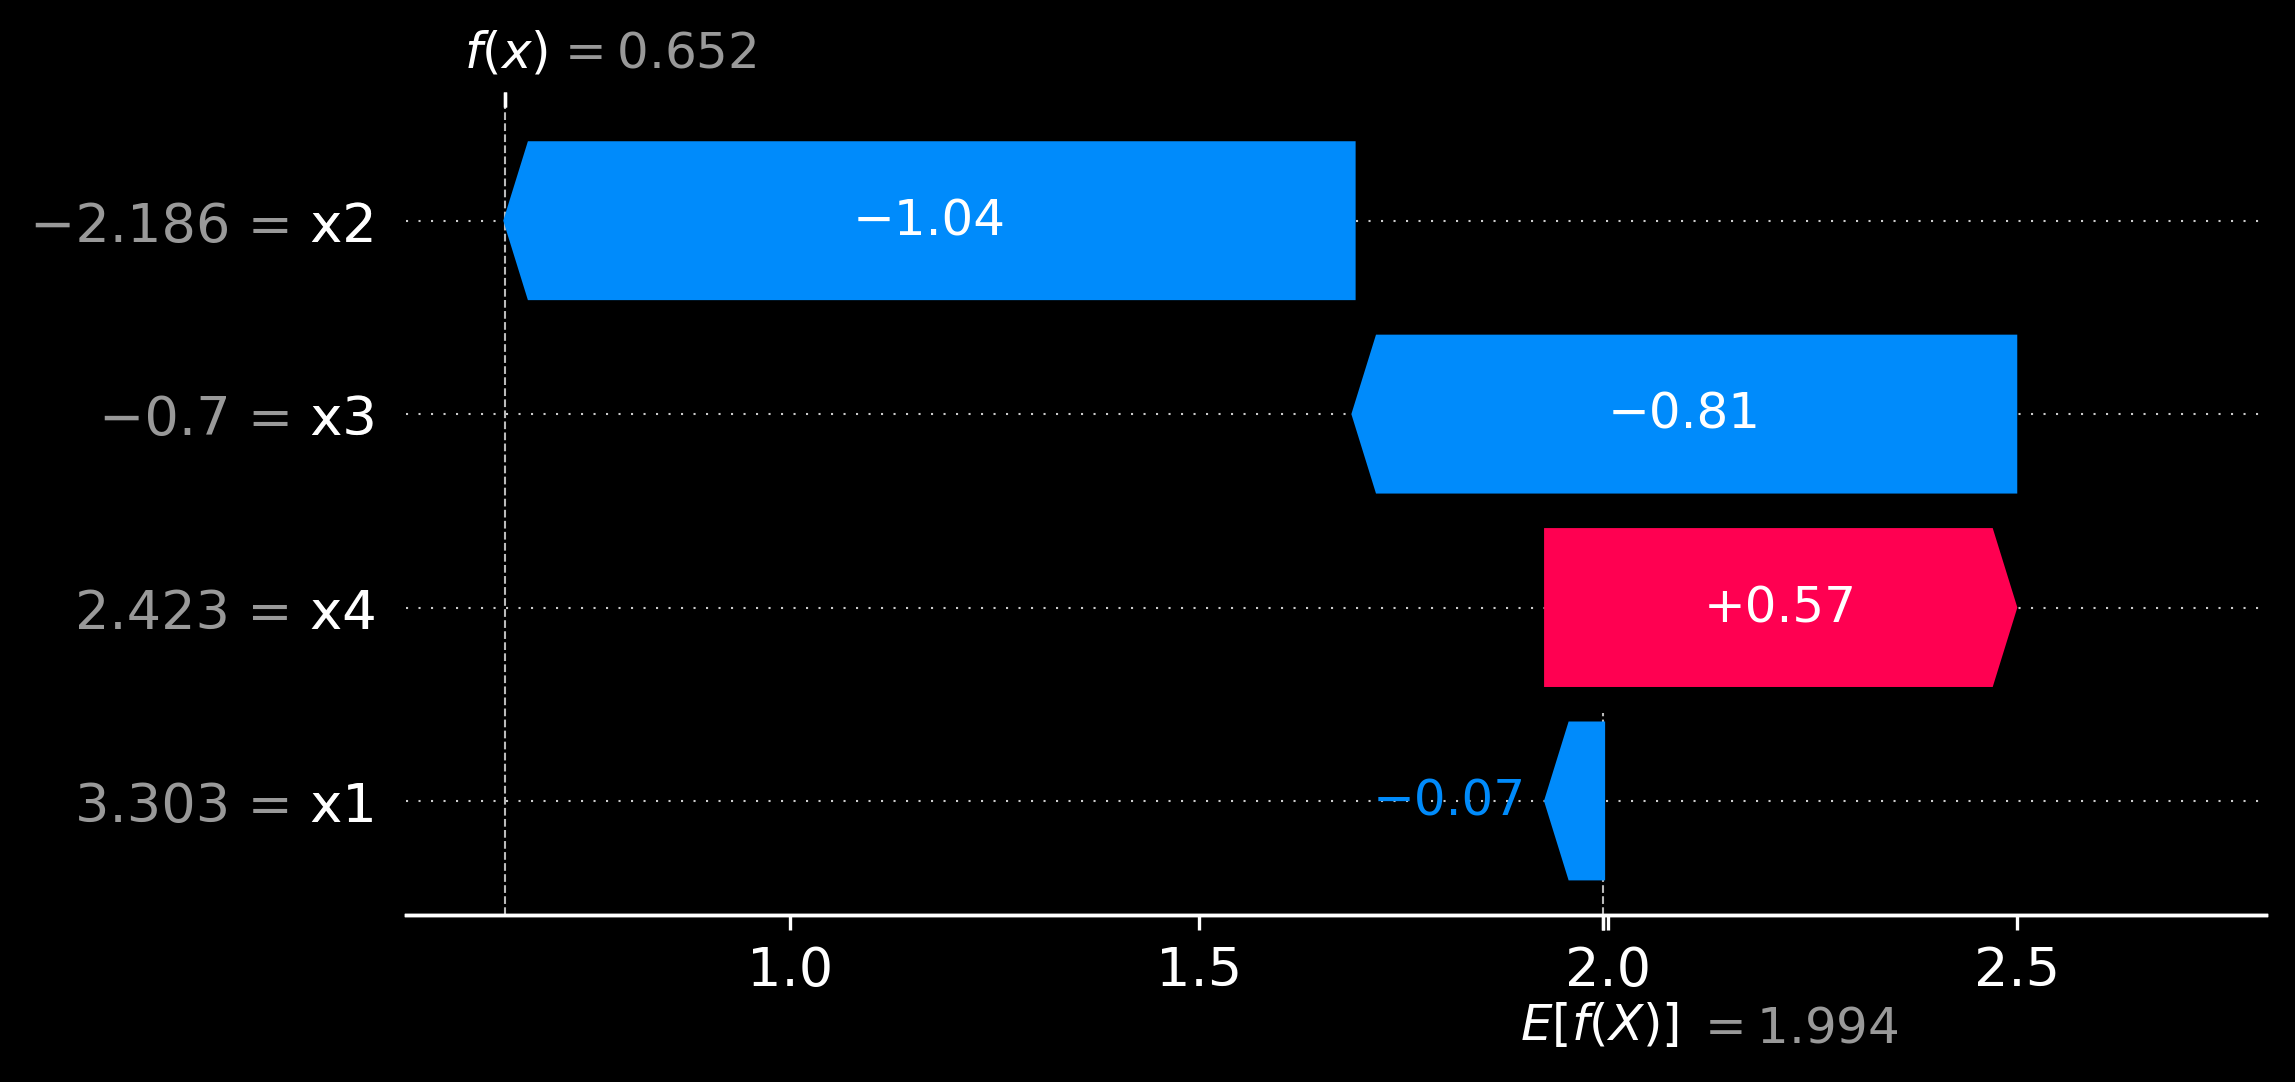

In [4]:
# Select a specific for visualizing Shapley values of each feature
instance_id = 47

# 1. Waterfall plot for individual prediction explanation
plt.figure()
shap.plots.waterfall(shap_values[instance_id], show=True)

In [5]:
coef_of_x1 = regression_model.coef_[0]
x1_value_sample_index = X_test['x1'][instance_id: instance_id + 1].item()
x1_mean_train = X_train['x1'].mean()
shap_val = coef_of_x1 * (x1_value_sample_index - x1_mean_train)
print(f"Shapley value of x1 for {instance_id + 1}-th instance using formula is {shap_val:.2f} \n It is the same as computed by SHAP library functions.")

Shapley value of x1 for 48-th instance using formula is -0.07 
 It is the same as computed by SHAP library functions.


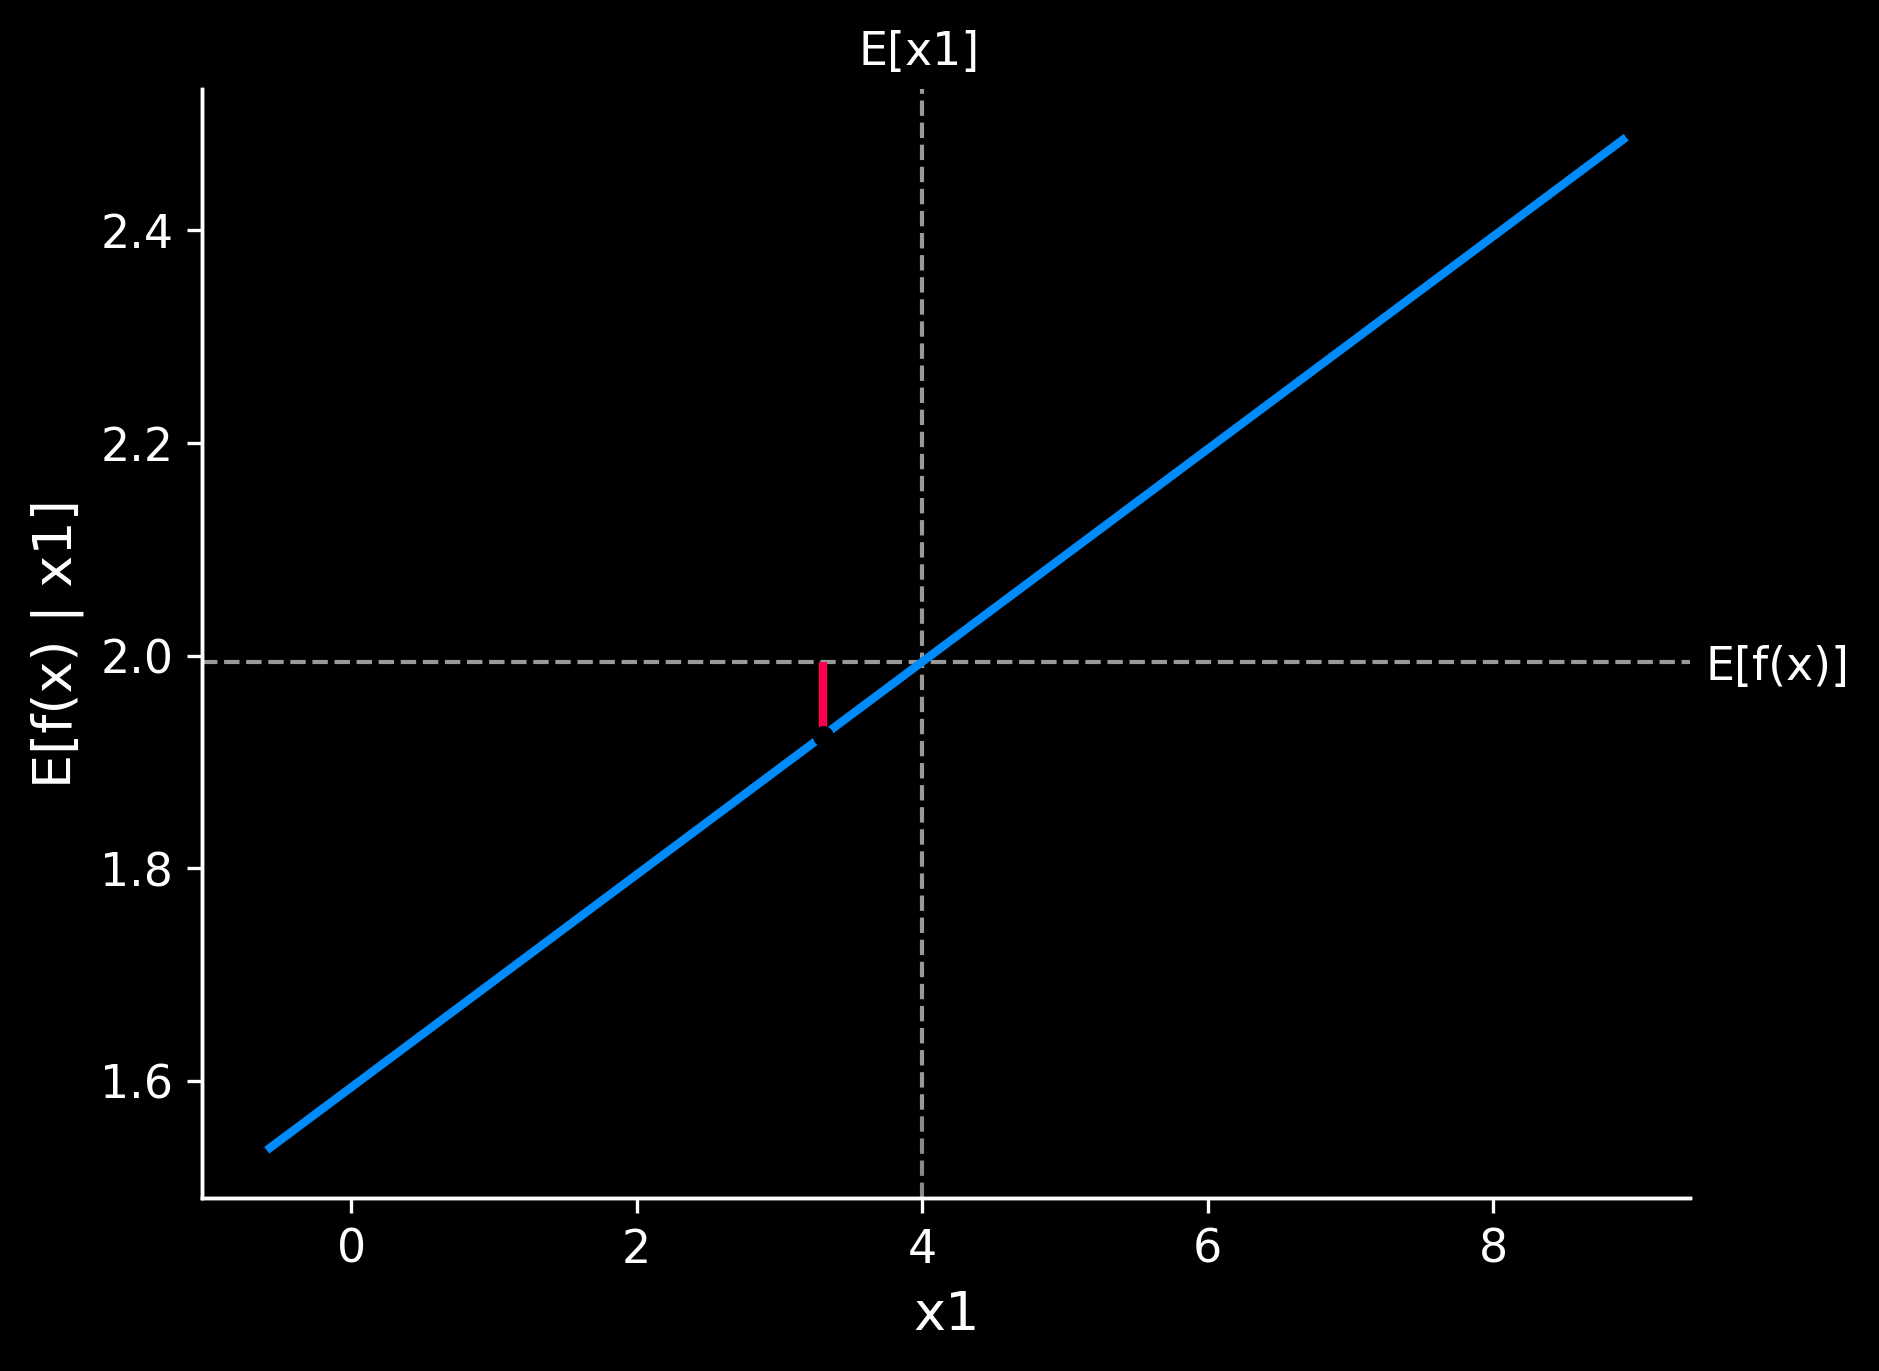

In [6]:
# 2. Partial dependence plot for feature 'x2'
fig, ax = shap.partial_dependence_plot(
    "x1",
    regression_model.predict,
    X_train,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values[instance_id:instance_id + 1, :]
)

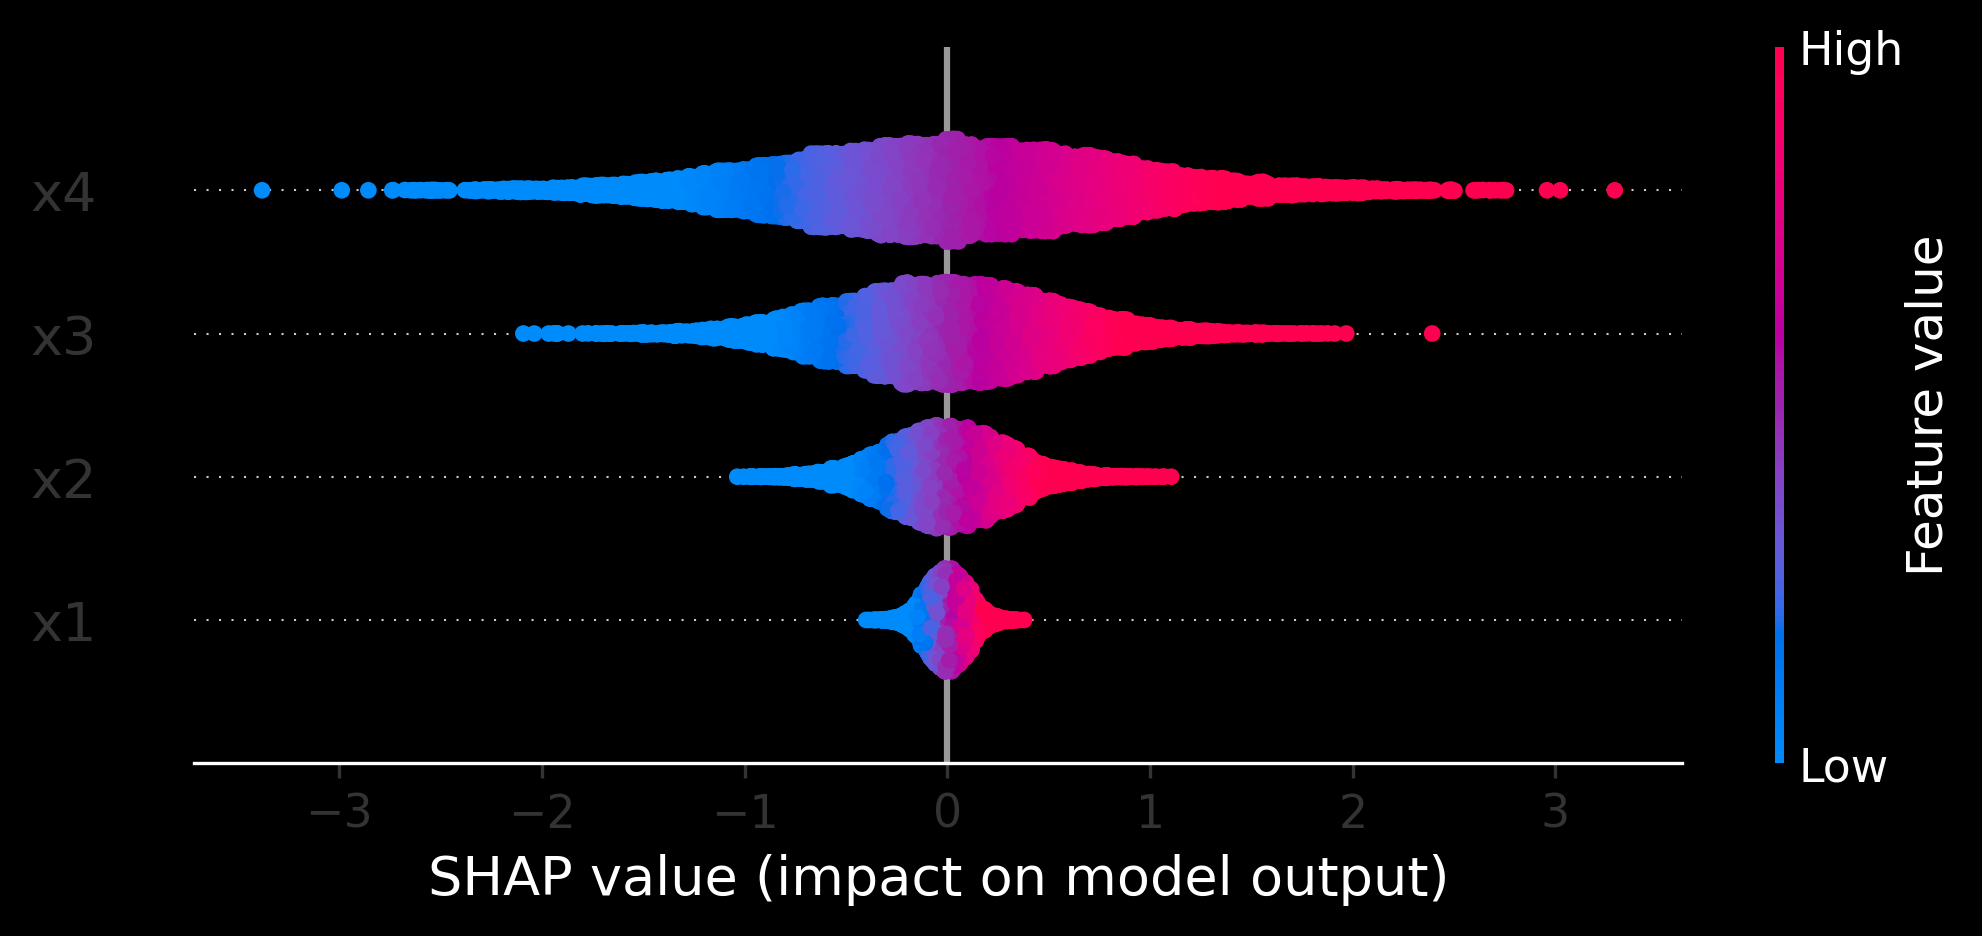

In [7]:
# 3. Beeswarm plot for global feature importance
plt.figure()
shap.plots.beeswarm(shap_values)

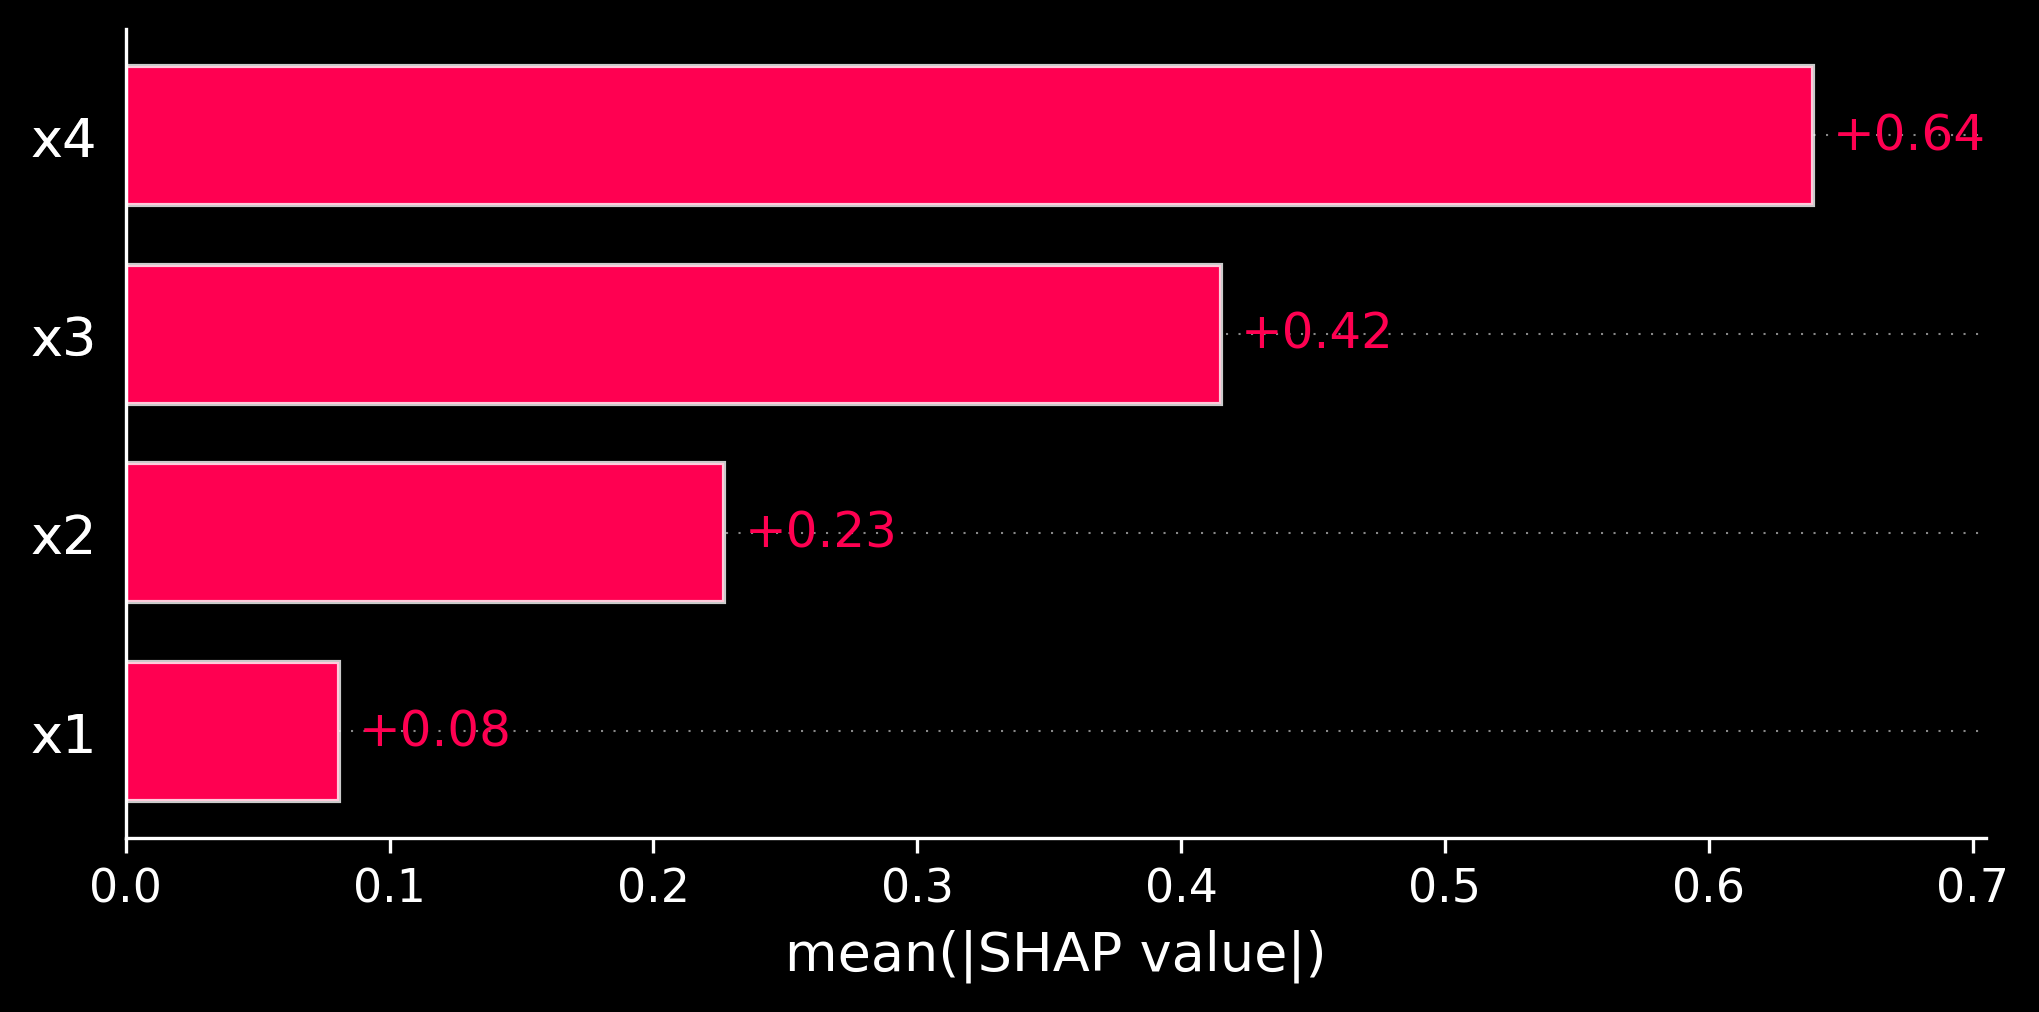

In [8]:
# 4. Bar plot for average feature importance
plt.figure()
shap.plots.bar(shap_values)